In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
path_for_files="C:/Users/brajesh/Downloads/healthcare-provider-fraud-detection/archive"

In [2]:
import os
import pandas as pd
for dirname, _, filenames in os.walk(path_for_files):
    for filename in filenames:
        print(filename)

Test-1542969243754.csv
Test_Beneficiarydata-1542969243754.csv
Test_Inpatientdata-1542969243754.csv
Test_Outpatientdata-1542969243754.csv
Train-1542865627584.csv
Train_Beneficiarydata-1542865627584.csv
Train_Inpatientdata-1542865627584.csv
Train_Outpatientdata-1542865627584.csv


In [3]:
# Function to load the inputs dataset
def read_data(tp = "Train", N = 1542865627584):
    path1=path_for_files
    target = pd.read_csv(path1 + "/{}-{}.csv".format(tp.title(), N))
    pt = pd.read_csv(path1 + "/{}_Beneficiarydata-{}.csv".format(tp.title(), N))
    in_pt = pd.read_csv(path1 + "/{}_Inpatientdata-{}.csv".format(tp.title(), N))
    out_pt = pd.read_csv(path1 + "/{}_Outpatientdata-{}.csv".format(tp.title(), N))
    return(in_pt, out_pt, pt, target)

### Load Train data
train_in_pt, train_out_pt, train_ben, train_target = read_data()

Train_Inpatient=train_in_pt
Train_Outpatient=train_out_pt
Train_Beneficiary=train_ben
Train=train_target

In [4]:
# Function to load the inputs dataset
def read_data(tp = "Test", N = 1542969243754):
    path1=path_for_files
    target = pd.read_csv(path1 + "/{}-{}.csv".format(tp.title(), N))
    pt = pd.read_csv(path1 + "/{}_Beneficiarydata-{}.csv".format(tp.title(), N))
    in_pt = pd.read_csv(path1 + "/{}_Inpatientdata-{}.csv".format(tp.title(), N))
    out_pt = pd.read_csv(path1 + "/{}_Outpatientdata-{}.csv".format(tp.title(), N))
    return(in_pt, out_pt, pt, target)

### Load Test data
test_in_pt, test_out_pt, test_ben, test_target = read_data()

Test_Inpatient=test_in_pt
Test_Outpatient=test_out_pt
Test_Beneficiary=test_ben
Test=test_target

In [5]:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

In [6]:
# display all the columns in a dataframe
pd.set_option('display.max_columns', None)

In [7]:
# Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No

Train_Beneficiary = Train_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

# For RenalDiseaseIndicator replacing 'Y' with 1
Train_Beneficiary = Train_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiary = Test_Beneficiary.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiary = Test_Beneficiary.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [8]:
# convert all these columns datatypes to numeric
Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Train_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Test_Beneficiary[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)

In [9]:
# calculate patient risk score by summing up all the chronic conditions.
# The higher risk score indicates the health of the patient is not good

Train_Beneficiary['Patient_Risk_Score'] = Train_Beneficiary['ChronicCond_Alzheimer'] + Train_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Train_Beneficiary['ChronicCond_KidneyDisease'] + Train_Beneficiary['ChronicCond_Cancer'] +\
                                        Train_Beneficiary['ChronicCond_ObstrPulmonary'] + Train_Beneficiary['ChronicCond_Depression'] +\
                                    Train_Beneficiary['ChronicCond_Diabetes'] + Train_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Train_Beneficiary['ChronicCond_Osteoporasis'] + Train_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Train_Beneficiary['ChronicCond_stroke'] + Train_Beneficiary['RenalDiseaseIndicator'] 

# calculate patient risk score by summing up all risk scores
Test_Beneficiary['Patient_Risk_Score'] = Test_Beneficiary['ChronicCond_Alzheimer'] + Test_Beneficiary['ChronicCond_Heartfailure'] + \
                                        Test_Beneficiary['ChronicCond_KidneyDisease'] + Test_Beneficiary['ChronicCond_Cancer'] +\
                                        Test_Beneficiary['ChronicCond_ObstrPulmonary'] + Test_Beneficiary['ChronicCond_Depression'] +\
                                    Test_Beneficiary['ChronicCond_Diabetes'] + Test_Beneficiary['ChronicCond_IschemicHeart'] +\
                                    Test_Beneficiary['ChronicCond_Osteoporasis'] + Test_Beneficiary['ChronicCond_rheumatoidarthritis'] +\
                                    Test_Beneficiary['ChronicCond_stroke'] + Test_Beneficiary['RenalDiseaseIndicator'] 

In [10]:
# Replacing '2' with '0' for Gender Type
Train_Beneficiary = Train_Beneficiary.replace({'Gender': 2}, 0)

Test_Beneficiary = Test_Beneficiary.replace({'Gender': 2}, 0)

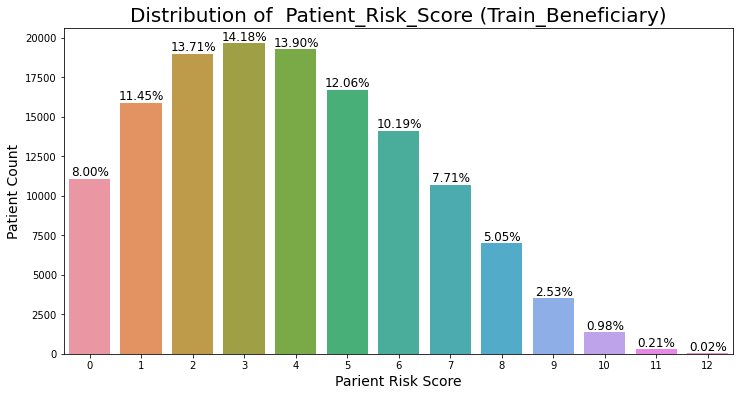

In [11]:
# Distribition of patient risk score
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Patient_Risk_Score',y=None, data=Train_Beneficiary, orient ="v")
plt.title('Distribution of  Patient_Risk_Score (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Parient Risk Score', size = 14)
plt.ylabel('Patient Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Patient_Risk_Score'], 0.01, 200,12)

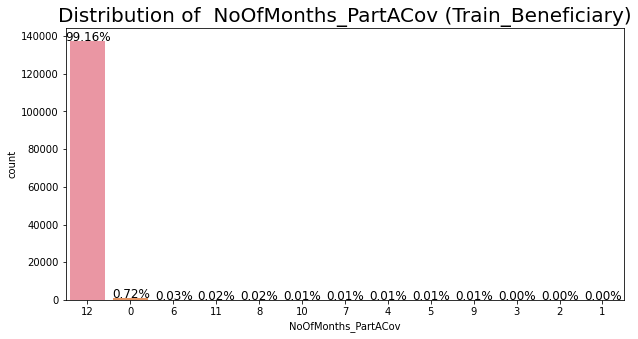

In [12]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartACov',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['NoOfMonths_PartACov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartACov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Race'], 0.01, 200,12)

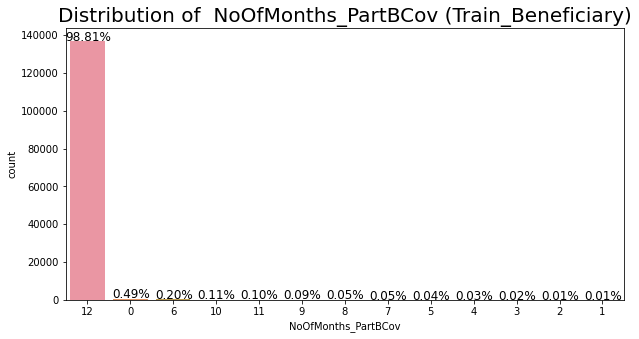

In [13]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartBCov',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['NoOfMonths_PartBCov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartBCov (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 14)
# plt.ylabel('Race Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Race'], 0.01, 200,12)

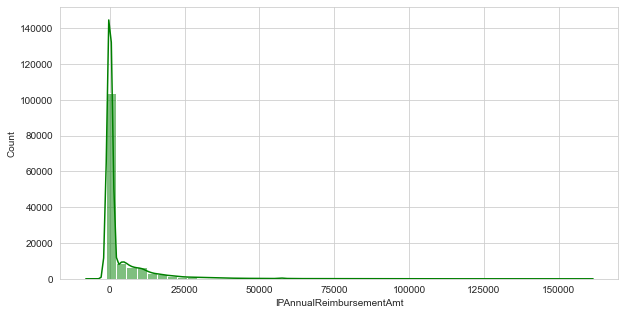

In [14]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['IPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

25 , 0.0 || 50 , 0.0 || 75 , 2280.0 || 100 , 161470.0 || 

90 , 12000.0 || 91 , 13000.0 || 92 , 14400.0 || 93 , 16000.0 || 94 , 18000.0 || 95 , 20260.0 || 96 , 24000.0 || 97 , 28243.50000000006 || 98 , 35000.0 || 99 , 49000.0 || 

99.1 , 51110.0 || 99.2 , 54000.0 || 99.3 , 57000.0 || 99.4 , 57100.0 || 99.5 , 59210.0 || 99.6 , 63000.0 || 99.7 , 67333.39999999967 || 99.8 , 74000.0 || 99.9 , 87000.0 || 100 , 161470.0 || 



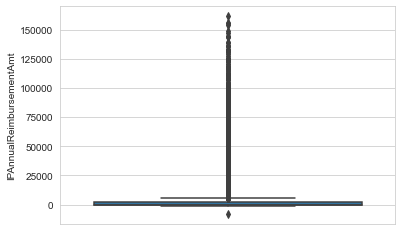

In [16]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")
print('\n')
for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")
print('\n')
for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualReimbursementAmt'], p), end=" || ")
print('\n')
# Plot boxplot for IPAnnualReimbursementAmt
sns.boxplot(y='IPAnnualReimbursementAmt', data=Train_Beneficiary)
plt.show()

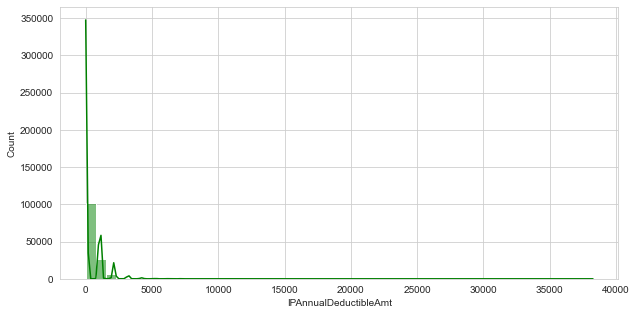

In [17]:
# Plot distribution of IPAnnualDeductibleAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['IPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [18]:
# check the percentiles
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualDeductibleAmt'], p), end=" || ")
    

print('\n'+'='*100)

for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualDeductibleAmt'], p), end=" || ")
    
print('\n'+'='*100)

for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['IPAnnualDeductibleAmt'], p), end=" || ")

25 , 0.0 || 50 , 0.0 || 75 , 1068.0 || 100 , 38272.0 || 
90 , 1068.0 || 91 , 1068.0 || 92 , 1068.0 || 93 , 1068.0 || 94 , 2136.0 || 95 , 2136.0 || 96 , 2136.0 || 97 , 2136.0 || 98 , 2136.0 || 99 , 3204.0 || 
99.1 , 3204.0 || 99.2 , 3204.0 || 99.3 , 4136.0 || 99.4 , 4272.0 || 99.5 , 4272.0 || 99.6 , 4272.0 || 99.7 , 5340.0 || 99.8 , 6272.0 || 99.9 , 9068.0 || 100 , 38272.0 || 

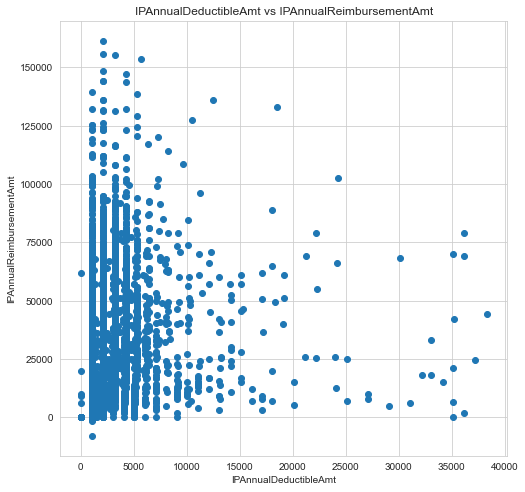

In [19]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(Train_Beneficiary.IPAnnualDeductibleAmt, Train_Beneficiary.IPAnnualReimbursementAmt)
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('IPAnnualReimbursementAmt')
plt.title('IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt')
plt.show()

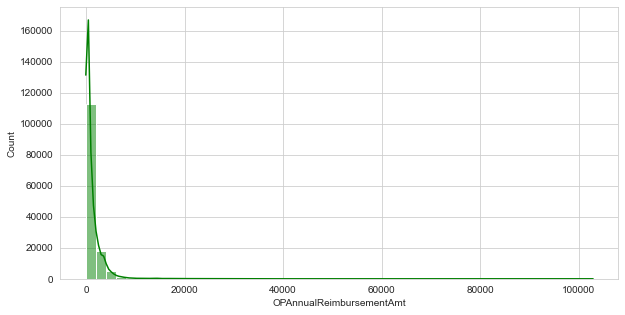

In [20]:
# Plot distribution of OPAnnualReimbursementAmt
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['OPAnnualReimbursementAmt'], kde = True, color ='green', bins = 50)
plt.show()

In [21]:
for p in range(25,101,25):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")
    

print('\n'+'='*100)

for p in range(90,100,1):
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")
    
print('\n'+'='*100)

for p in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(p, ",", np.percentile(Train_Beneficiary['OPAnnualReimbursementAmt'], p), end=" || ")

25 , 170.0 || 50 , 570.0 || 75 , 1500.0 || 100 , 102960.0 || 
90 , 3230.0 || 91 , 3380.500000000029 || 92 , 3560.0 || 93 , 3780.0 || 94 , 4030.0 || 95 , 4370.0 || 96 , 4850.0 || 97 , 5540.0 || 98 , 6850.0 || 99 , 11514.500000000116 || 
99.1 , 12680.250000000233 || 99.2 , 13840.0 || 99.3 , 14741.149999999907 || 99.4 , 16173.400000000256 || 99.5 , 17666.750000000175 || 99.6 , 19197.79999999999 || 99.7 , 21406.699999999837 || 99.8 , 24230.0 || 99.9 , 28694.45000000007 || 100 , 102960.0 || 

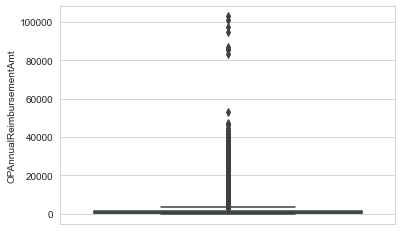

In [22]:
# plot boxplot for OPAnnualReimbursementAmt
sns.boxplot(y='OPAnnualReimbursementAmt', data=Train_Beneficiary)
plt.show()

In [23]:
Train_Beneficiary['DOB'][0]

'1/1/1943'

In [24]:
# Convert Date of Birth and Date of Death from String to Datetime format
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format = '%d/%m/%Y')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'],format ='%d/%m/%Y')

Test_Beneficiary['DOB'] = pd.to_datetime(Test_Beneficiary['DOB'] , format = '%d/%m/%Y')
Test_Beneficiary['DOD'] = pd.to_datetime(Test_Beneficiary['DOD'],format ='%d/%m/%Y')

In [25]:
# Check last date DOD
Train_Beneficiary['DOD'].max()

Timestamp('2009-01-12 00:00:00')

In [26]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the birth month and Birth year for DOB and DOD
Train_Beneficiary['Birth_Year'] = Train_Beneficiary['DOB'].dt.year
Train_Beneficiary['Birth_Month'] = Train_Beneficiary['DOB'].dt.month

Test_Beneficiary['Birth_Year'] = Test_Beneficiary['DOB'].dt.year
Test_Beneficiary['Birth_Month'] = Test_Beneficiary['DOB'].dt.month

In [27]:
# https://stackoverflow.com/questions/46508895/calculating-age-from-date-time-format-in-python-pandas?noredirect=1&lq=1
Train_Beneficiary['Patient_Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365)
Train_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Train_Beneficiary['DOB']).dt.days)/365),inplace=True)

Test_Beneficiary['Patient_Age'] = round(((Test_Beneficiary['DOD'] - Test_Beneficiary['DOB']).dt.days)/365)
Test_Beneficiary.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Test_Beneficiary['DOB']).dt.days)/365),inplace=True)

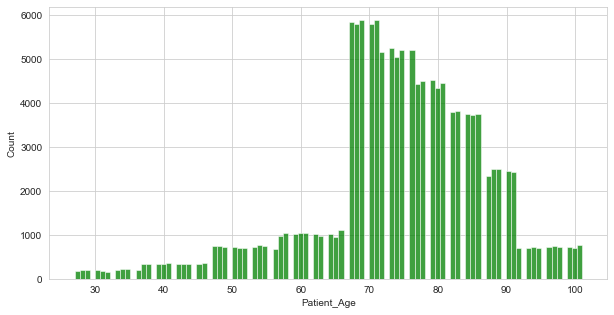

In [28]:
# Plot distribution of age
sns.set_style('whitegrid') 
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['Patient_Age'], kde = False, color ='green', bins = 100)
plt.show()

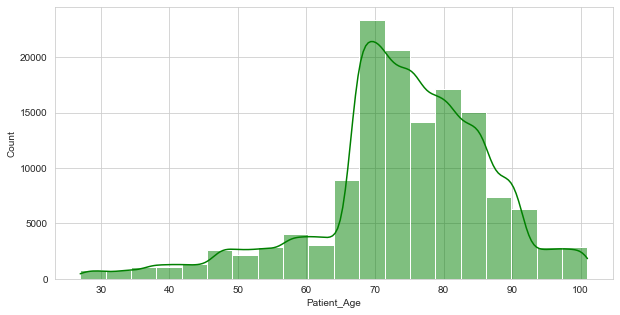

In [29]:
# Plot distribution of age
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiary['Patient_Age'], kde = True, color ='green', bins = 20)
plt.show()

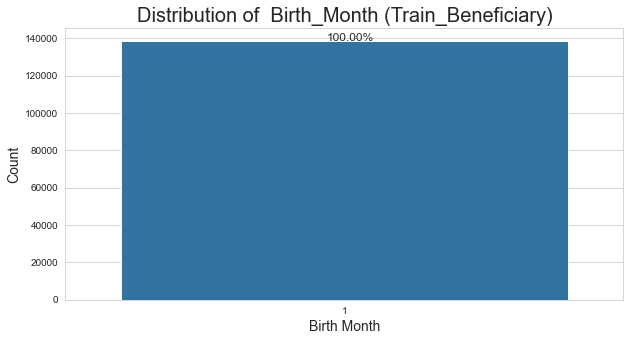

In [30]:
# Plot distribution of birth month of patients
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Birth_Month',y=None, data=Train_Beneficiary, orient ="v", order = Train_Beneficiary['Birth_Month'].value_counts().index)
plt.title('Distribution of  Birth_Month (Train_Beneficiary)', fontsize=20)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Birth Month', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Beneficiary['Birth_Month'], 0.01, 20,12)

In [31]:
# Set value=1 if the patient is dead i.e DOD value is not null
Train_Beneficiary['isDead'] = 0
Train_Beneficiary.loc[Train_Beneficiary.DOD.notna(), 'isDead'] = 1
Test_Beneficiary['isDead'] = 0
Test_Beneficiary.loc[Test_Beneficiary.DOD.notna(), 'isDead'] = 1

In [32]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Inpatient['ClaimStartDt'] = pd.to_datetime(Train_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Inpatient['ClaimEndDt'] = pd.to_datetime(Train_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Inpatient['ClaimStartDt'] = pd.to_datetime(Test_Inpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Inpatient['ClaimEndDt'] = pd.to_datetime(Test_Inpatient['ClaimEndDt'],format = '%Y-%m-%d')

# convert AdmissionDt, DischargeDt from string to datetime format
Train_Inpatient['AdmissionDt'] = pd.to_datetime(Train_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatient['DischargeDt'] = pd.to_datetime(Train_Inpatient['DischargeDt'],format = '%Y-%m-%d')

Test_Inpatient['AdmissionDt'] = pd.to_datetime(Test_Inpatient['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatient['DischargeDt'] = pd.to_datetime(Test_Inpatient['DischargeDt'],format = '%Y-%m-%d')

In [33]:
# Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
Train_Inpatient['Hospitalization_Duration'] = ((Train_Inpatient['DischargeDt'] - Train_Inpatient['AdmissionDt']).dt.days)+1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Inpatient['Claim_Period'] = ((Train_Inpatient['ClaimEndDt'] - Train_Inpatient['ClaimStartDt']).dt.days)+1

Test_Inpatient['Hospitalization_Duration'] = ((Test_Inpatient['DischargeDt'] - Test_Inpatient['AdmissionDt']).dt.days)+1
Test_Inpatient['Claim_Period'] = ((Test_Inpatient['ClaimEndDt'] - Test_Inpatient['ClaimStartDt']).dt.days)+1

In [34]:
# ExtraClaimDays = Claim_Period - Hospitalization_Duration
Train_Inpatient['ExtraClaimDays'] = np.where(Train_Inpatient['Claim_Period']>Train_Inpatient['Hospitalization_Duration'], Train_Inpatient['Claim_Period'] - Train_Inpatient['Hospitalization_Duration'], 0)
Test_Inpatient['ExtraClaimDays'] = np.where(Test_Inpatient['Claim_Period']>Test_Inpatient['Hospitalization_Duration'], Test_Inpatient['Claim_Period'] - Test_Inpatient['Hospitalization_Duration'], 0)

In [35]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
Train_Inpatient['ClaimStart_Year'] = Train_Inpatient['ClaimStartDt'].dt.year
Train_Inpatient['ClaimStart_Month'] = Train_Inpatient['ClaimStartDt'].dt.month
Test_Inpatient['ClaimStart_Year'] = Test_Inpatient['ClaimStartDt'].dt.year
Test_Inpatient['ClaimStart_Month'] = Test_Inpatient['ClaimStartDt'].dt.month

Train_Inpatient['ClaimEnd_Year'] = Train_Inpatient['ClaimEndDt'].dt.year
Train_Inpatient['ClaimEnd_Month'] = Train_Inpatient['ClaimEndDt'].dt.month
Test_Inpatient['ClaimEnd_Year'] = Test_Inpatient['ClaimEndDt'].dt.year
Test_Inpatient['ClaimEnd_Month'] = Test_Inpatient['ClaimEndDt'].dt.month

In [36]:
# Get the month and year of Admission_Year and Admission_Month
Train_Inpatient['Admission_Year'] = Train_Inpatient['AdmissionDt'].dt.year
Train_Inpatient['Admission_Month'] = Train_Inpatient['AdmissionDt'].dt.month
Test_Inpatient['Admission_Year'] = Test_Inpatient['AdmissionDt'].dt.year
Test_Inpatient['Admission_Month'] = Test_Inpatient['AdmissionDt'].dt.month

Train_Inpatient['Discharge_Year'] = Train_Inpatient['DischargeDt'].dt.year
Train_Inpatient['Discharge_Month'] = Train_Inpatient['DischargeDt'].dt.month
Test_Inpatient['Discharge_Year'] = Test_Inpatient['DischargeDt'].dt.year
Test_Inpatient['Discharge_Month'] = Test_Inpatient['DischargeDt'].dt.month

In [37]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_IP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_IP_df['ProcedureCode'] = pd.concat([Train_Inpatient["ClmProcedureCode_1"], 
                                   Train_Inpatient["ClmProcedureCode_2"],
                                   Train_Inpatient["ClmProcedureCode_3"],
                                   Train_Inpatient["ClmProcedureCode_4"], 
                                   Train_Inpatient["ClmProcedureCode_5"], 
                                   Train_Inpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [38]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_IP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_IP_df['DiagnosisCode'] = pd.concat([Train_Inpatient["ClmDiagnosisCode_1"], 
                                           Train_Inpatient["ClmDiagnosisCode_2"], 
                                           Train_Inpatient["ClmDiagnosisCode_3"], 
                                           Train_Inpatient["ClmDiagnosisCode_4"],
                                           Train_Inpatient["ClmDiagnosisCode_5"], 
                                           Train_Inpatient["ClmDiagnosisCode_6"],
                                           Train_Inpatient["ClmDiagnosisCode_7"],
                                           Train_Inpatient["ClmDiagnosisCode_8"],
                                           Train_Inpatient["ClmDiagnosisCode_9"],
                                           Train_Inpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [39]:
# Calculate total InscClaimAmtReimbursed for inpatient
Train_Inpatient['InscClaimAmtReimbursed'].notna().sum()

40474

In [40]:
Train_Inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month'],
      dtype='object')

In [41]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Outpatient['ClaimStartDt'] = pd.to_datetime(Train_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Outpatient['ClaimEndDt'] = pd.to_datetime(Train_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

Test_Outpatient['ClaimStartDt'] = pd.to_datetime(Test_Outpatient['ClaimStartDt'] , format = '%Y-%m-%d')
Test_Outpatient['ClaimEndDt'] = pd.to_datetime(Test_Outpatient['ClaimEndDt'],format = '%Y-%m-%d')

In [42]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# Get the months and year of claim start and claim end
Train_Outpatient['ClaimStart_Year'] = Train_Outpatient['ClaimStartDt'].dt.year
Train_Outpatient['ClaimStart_Month'] = Train_Outpatient['ClaimStartDt'].dt.month
Test_Outpatient['ClaimStart_Year'] = Test_Outpatient['ClaimStartDt'].dt.year
Test_Outpatient['ClaimStart_Month'] = Test_Outpatient['ClaimStartDt'].dt.month

Train_Outpatient['ClaimEnd_Year'] = Train_Outpatient['ClaimEndDt'].dt.year
Train_Outpatient['ClaimEnd_Month'] = Train_Outpatient['ClaimEndDt'].dt.month
Test_Outpatient['ClaimEnd_Year'] = Test_Outpatient['ClaimEndDt'].dt.year
Test_Outpatient['ClaimEnd_Month'] = Test_Outpatient['ClaimEndDt'].dt.month

In [43]:
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Outpatient['Claim_Period'] = ((Train_Outpatient['ClaimEndDt'] - Train_Outpatient['ClaimStartDt']).dt.days)+1

Test_Outpatient['Claim_Period'] = ((Test_Outpatient['ClaimEndDt'] - Test_Outpatient['ClaimStartDt']).dt.days)+1

In [44]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_OP_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_OP_df['ProcedureCode'] = pd.concat([Train_Outpatient["ClmProcedureCode_1"], 
                                   Train_Outpatient["ClmProcedureCode_2"],
                                   Train_Outpatient["ClmProcedureCode_3"],
                                   Train_Outpatient["ClmProcedureCode_4"], 
                                   Train_Outpatient["ClmProcedureCode_5"], 
                                   Train_Outpatient["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [45]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_OP_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_OP_df['DiagnosisCode'] = pd.concat([Train_Outpatient["ClmDiagnosisCode_1"], 
                                           Train_Outpatient["ClmDiagnosisCode_2"], 
                                           Train_Outpatient["ClmDiagnosisCode_3"], 
                                           Train_Outpatient["ClmDiagnosisCode_4"],
                                           Train_Outpatient["ClmDiagnosisCode_5"], 
                                           Train_Outpatient["ClmDiagnosisCode_6"],
                                           Train_Outpatient["ClmDiagnosisCode_7"],
                                           Train_Outpatient["ClmDiagnosisCode_8"],
                                           Train_Outpatient["ClmDiagnosisCode_9"],
                                           Train_Outpatient["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [46]:
Train_Outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period'],
      dtype='object')

In [47]:
# Create a new column Inpatient_or_Outpatient where Inpatient =1 and Outpatient = 0
Train_Inpatient['Inpatient_or_Outpatient'] = 1
Train_Outpatient['Inpatient_or_Outpatient'] = 0
Test_Inpatient['Inpatient_or_Outpatient'] = 1
Test_Outpatient['Inpatient_or_Outpatient'] = 0

In [48]:
# Merge inpatient and outpatient dataframes based on common columns
common_columns = [ idx for idx in Train_Outpatient.columns if idx in Train_Inpatient.columns]
print(common_columns)
Inpatient_Outpatient_Merge = pd.merge(Train_Inpatient, Train_Outpatient, left_on = common_columns, right_on = common_columns,how = 'outer')

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Claim_Period', 'Inpatient_or_Outpatient']


In [49]:
# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge = pd.merge(Inpatient_Outpatient_Merge, Train_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

# Merge provider details
Final_Dataset_Train = pd.merge(Inpatient_Outpatient_Beneficiary_Merge, Train , how = 'inner', on = 'Provider' )

In [50]:
# Merge inpatient and outpatient dataframes based on common columns

common_columns_test = [ idx for idx in Test_Outpatient.columns if idx in Test_Inpatient.columns]
Inpatient_Outpatient_Merge_Te = pd.merge(Test_Inpatient, Test_Outpatient, left_on = common_columns_test, right_on = common_columns_test,how = 'outer')

# Merge beneficiary details with inpatient and outpatient data
Inpatient_Outpatient_Beneficiary_Merge_Te = pd.merge(Inpatient_Outpatient_Merge_Te, Test_Beneficiary,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

Final_Dataset_Test = pd.merge(Inpatient_Outpatient_Beneficiary_Merge_Te, Test , how = 'inner', on = 'Provider' )

In [51]:
Final_Dataset_Train.shape

(558211, 72)

In [52]:
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_number_of_inpatient_claims 

40474

In [53]:
#Calculatinng total and percentage money lost for Inpatient
Total_number_of_inpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].count()
Total_Money_Fraud_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Inpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 1)].sum()
print("Total_Money_Spent_Inpatient : ",Total_Money_Spent_Inpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Inpatient/Total_number_of_inpatient_claims))
print("Total_Money_Fraud_Inpatient : ",Total_Money_Fraud_Inpatient)
print("Percentage of money spent in fraud for Inpatient = {:.2f}%".format(Total_Money_Fraud_Inpatient/Total_Money_Spent_Inpatient *100))

Total_Money_Spent_Inpatient :  408297020
Average reimbursed amount per patient : 10088
Total_Money_Fraud_Inpatient :  241288510
Percentage of money spent in fraud for Inpatient = 59.10%


In [54]:
#Calculatinng total and percentage money lost for Outpatient
Total_number_of_Outpatient_claims = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].count()
Total_Money_Fraud_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0) & (Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent_Outpatient = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.Inpatient_or_Outpatient == 0)].sum()
print("Total_Money_Spent_Outpatient : ",Total_Money_Spent_Outpatient)
print('Average reimbursed amount per patient :' , round(Total_Money_Spent_Outpatient/Total_number_of_Outpatient_claims))
print("Total_Money_Fraud_Outpatient : ",Total_Money_Fraud_Outpatient)
print("Percentage of money spent in fraud for Outpatient = {:.2f}%".format(Total_Money_Fraud_Outpatient/Total_Money_Spent_Outpatient *100))

Total_Money_Spent_Outpatient :  148246120
Average reimbursed amount per patient : 286
Total_Money_Fraud_Outpatient :  54392610
Percentage of money spent in fraud for Outpatient = 36.69%


In [55]:
#Calculatinng total and percentage money lost for overall data
Total_Money_Fraud = Final_Dataset_Train.InscClaimAmtReimbursed[(Final_Dataset_Train.PotentialFraud == 'Yes')].sum()
Total_Money_Spent = Final_Dataset_Train.InscClaimAmtReimbursed.sum()
print("Total_Money_Spent : ",Total_Money_Spent)
print("Total_Money_Fraud : ",Total_Money_Fraud)
print("Percentage of money spent in fraud = {:.2f}%".format(Total_Money_Fraud/Total_Money_Spent *100))

Total_Money_Spent :  556543140
Total_Money_Fraud :  295681120
Percentage of money spent in fraud = 53.13%


In [56]:
# Concat all the claim precedurecodes in a single dataframe
ClmProcedureCode_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCode_df['ProcedureCode'] = pd.concat([Final_Dataset_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [57]:
# Concat all the claim DiagnosisCodes in a single dataframe
ClmDiagnosisCode_df = pd.DataFrame(columns = ['DiagnosisCode'])

ClmDiagnosisCode_df['DiagnosisCode'] = pd.concat([Final_Dataset_Train["ClmDiagnosisCode_1"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_2"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_3"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_4"],
                                           Final_Dataset_Train["ClmDiagnosisCode_5"], 
                                           Final_Dataset_Train["ClmDiagnosisCode_6"],
                                           Final_Dataset_Train["ClmDiagnosisCode_7"],
                                           Final_Dataset_Train["ClmDiagnosisCode_8"],
                                           Final_Dataset_Train["ClmDiagnosisCode_9"],
                                           Final_Dataset_Train["ClmDiagnosisCode_10"]], axis=0, sort=True).dropna()

In [58]:
# Separate dataframe with fraud only
Final_Dataset_Fraud_Train = Final_Dataset_Train[Final_Dataset_Train.PotentialFraud == 'Yes']
ClmProcedureCodeFraud_df = pd.DataFrame(columns = ['ProcedureCode'])
ClmProcedureCodeFraud_df['ProcedureCode'] = pd.concat([Final_Dataset_Fraud_Train["ClmProcedureCode_1"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_2"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_3"],
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_4"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_5"], 
                                   Final_Dataset_Fraud_Train["ClmProcedureCode_6"]], axis=0, sort=True).dropna()

In [59]:
# create new feature total reimbursement amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Train['IPAnnualReimbursementAmt'] + Final_Dataset_Train['OPAnnualReimbursementAmt']
# create new feature total deductible amount for inpatient and outpatient
Final_Dataset_Train['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Train['IPAnnualDeductibleAmt'] + Final_Dataset_Train['OPAnnualDeductibleAmt']

Final_Dataset_Test['IP_OP_TotalReimbursementAmt'] = Final_Dataset_Test['IPAnnualReimbursementAmt'] + Final_Dataset_Test['OPAnnualReimbursementAmt']
Final_Dataset_Test['IP_OP_AnnualDeductibleAmt'] = Final_Dataset_Test['IPAnnualDeductibleAmt'] + Final_Dataset_Test['OPAnnualDeductibleAmt']

In [60]:
Final_Dataset_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

In [61]:
## Fill missing results using 0
Final_Dataset_Train = Final_Dataset_Train.fillna(0).copy()
Final_Dataset_Test = Final_Dataset_Test.fillna(0).copy()

In [62]:
def create_feature_using_groupby(Train_df, Test_df, gruopby_col, operation_col,operation):
    '''
    This function groupby the 'Train_df' and 'Test_df' dataframe by 'gruopby_col' and performs 'operation' on 'operation_col'
    '''
    
    for col in operation_col:
        # create new column name for the dataframe
        new_col_name = 'Per'+''.join(gruopby_col)+'_'+operation+'_'+col
        print(new_col_name)
        Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
        Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
    return Train_df, Test_df

In [63]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test = create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], columns, 'mean')

PerProvider_mean_InscClaimAmtReimbursed
PerProvider_mean_DeductibleAmtPaid
PerProvider_mean_IPAnnualReimbursementAmt
PerProvider_mean_IPAnnualDeductibleAmt
PerProvider_mean_OPAnnualReimbursementAmt
PerProvider_mean_OPAnnualDeductibleAmt
PerProvider_mean_Patient_Age
PerProvider_mean_NoOfMonths_PartACov
PerProvider_mean_NoOfMonths_PartBCov
PerProvider_mean_Hospitalization_Duration
PerProvider_mean_Claim_Period
PerProvider_mean_Patient_Risk_Score


In [64]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['BeneID'], columns, 'mean')

PerBeneID_mean_InscClaimAmtReimbursed
PerBeneID_mean_DeductibleAmtPaid
PerBeneID_mean_IPAnnualReimbursementAmt
PerBeneID_mean_IPAnnualDeductibleAmt
PerBeneID_mean_OPAnnualReimbursementAmt
PerBeneID_mean_OPAnnualDeductibleAmt
PerBeneID_mean_Patient_Age
PerBeneID_mean_Hospitalization_Duration
PerBeneID_mean_Claim_Period
PerBeneID_mean_Patient_Risk_Score


In [65]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration', 'Claim_Period', 'Patient_Risk_Score']

Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['AttendingPhysician'], columns, 'mean')

PerAttendingPhysician_mean_InscClaimAmtReimbursed
PerAttendingPhysician_mean_DeductibleAmtPaid
PerAttendingPhysician_mean_IPAnnualReimbursementAmt
PerAttendingPhysician_mean_IPAnnualDeductibleAmt
PerAttendingPhysician_mean_OPAnnualReimbursementAmt
PerAttendingPhysician_mean_OPAnnualDeductibleAmt
PerAttendingPhysician_mean_Patient_Age
PerAttendingPhysician_mean_Hospitalization_Duration
PerAttendingPhysician_mean_Claim_Period
PerAttendingPhysician_mean_Patient_Risk_Score


In [66]:
columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
           'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Patient_Age', 'Hospitalization_Duration',
           'Claim_Period', 'Patient_Risk_Score']

col1=['Provider',
'BeneID',
'AttendingPhysician',
'OperatingPhysician',
'OtherPhysician',
'DiagnosisGroupCode',
'ClmAdmitDiagnosisCode',
'ClmProcedureCode_1',
'ClmProcedureCode_2',
'ClmProcedureCode_3',
'ClmProcedureCode_4',
'ClmProcedureCode_5',
'ClmProcedureCode_6',
'ClmDiagnosisCode_1',
'ClmDiagnosisCode_2',
'ClmDiagnosisCode_3',
'ClmDiagnosisCode_4',
'ClmDiagnosisCode_5',
'ClmDiagnosisCode_6'
]

In [69]:
for i in col1:
    print(i)
    Final_Dataset_Train,Final_Dataset_Test = \
        create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, [i], columns, 'mean')

Provider
PerProvider_mean_InscClaimAmtReimbursed
PerProvider_mean_DeductibleAmtPaid
PerProvider_mean_IPAnnualReimbursementAmt
PerProvider_mean_IPAnnualDeductibleAmt
PerProvider_mean_OPAnnualReimbursementAmt
PerProvider_mean_OPAnnualDeductibleAmt
PerProvider_mean_Patient_Age
PerProvider_mean_Hospitalization_Duration
PerProvider_mean_Claim_Period
PerProvider_mean_Patient_Risk_Score
BeneID
PerBeneID_mean_InscClaimAmtReimbursed
PerBeneID_mean_DeductibleAmtPaid
PerBeneID_mean_IPAnnualReimbursementAmt
PerBeneID_mean_IPAnnualDeductibleAmt
PerBeneID_mean_OPAnnualReimbursementAmt
PerBeneID_mean_OPAnnualDeductibleAmt
PerBeneID_mean_Patient_Age
PerBeneID_mean_Hospitalization_Duration
PerBeneID_mean_Claim_Period
PerBeneID_mean_Patient_Risk_Score
AttendingPhysician
PerAttendingPhysician_mean_InscClaimAmtReimbursed
PerAttendingPhysician_mean_DeductibleAmtPaid
PerAttendingPhysician_mean_IPAnnualReimbursementAmt
PerAttendingPhysician_mean_IPAnnualDeductibleAmt
PerAttendingPhysician_mean_OPAnnualReimbu

C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

ClmProcedureCode_4
PerClmProcedureCode_4_mean_InscClaimAmtReimbursed
PerClmProcedureCode_4_mean_DeductibleAmtPaid
PerClmProcedureCode_4_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_4_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_4_mean_Patient_Age
PerClmProcedureCode_4_mean_Hospitalization_Duration


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmProcedureCode_4_mean_Claim_Period
PerClmProcedureCode_4_mean_Patient_Risk_Score
ClmProcedureCode_5
PerClmProcedureCode_5_mean_InscClaimAmtReimbursed
PerClmProcedureCode_5_mean_DeductibleAmtPaid
PerClmProcedureCode_5_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_5_mean_OPAnnualReimbursementAmt
PerClmProcedureCode_5_mean_OPAnnualDeductibleAmt


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmProcedureCode_5_mean_Patient_Age
PerClmProcedureCode_5_mean_Hospitalization_Duration
PerClmProcedureCode_5_mean_Claim_Period
PerClmProcedureCode_5_mean_Patient_Risk_Score
ClmProcedureCode_6
PerClmProcedureCode_6_mean_InscClaimAmtReimbursed
PerClmProcedureCode_6_mean_DeductibleAmtPaid
PerClmProcedureCode_6_mean_IPAnnualReimbursementAmt
PerClmProcedureCode_6_mean_IPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_OPAnnualReimbursementAmt


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmProcedureCode_6_mean_OPAnnualDeductibleAmt
PerClmProcedureCode_6_mean_Patient_Age
PerClmProcedureCode_6_mean_Hospitalization_Duration
PerClmProcedureCode_6_mean_Claim_Period
PerClmProcedureCode_6_mean_Patient_Risk_Score
ClmDiagnosisCode_1
PerClmDiagnosisCode_1_mean_InscClaimAmtReimbursed


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_1_mean_DeductibleAmtPaid
PerClmDiagnosisCode_1_mean_IPAnnualReimbursementAmt


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_1_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_1_mean_OPAnnualReimbursementAmt


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_1_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_1_mean_Patient_Age


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_1_mean_Hospitalization_Duration
PerClmDiagnosisCode_1_mean_Claim_Period


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_1_mean_Patient_Risk_Score
ClmDiagnosisCode_2
PerClmDiagnosisCode_2_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_2_mean_DeductibleAmtPaid


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_2_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_2_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_2_mean_OPAnnualReimbursementAmt


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_2_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_2_mean_Patient_Age
PerClmDiagnosisCode_2_mean_Hospitalization_Duration


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_2_mean_Claim_Period
PerClmDiagnosisCode_2_mean_Patient_Risk_Score


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

ClmDiagnosisCode_3
PerClmDiagnosisCode_3_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_3_mean_DeductibleAmtPaid
PerClmDiagnosisCode_3_mean_IPAnnualReimbursementAmt


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_3_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_3_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_3_mean_OPAnnualDeductibleAmt


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_3_mean_Patient_Age
PerClmDiagnosisCode_3_mean_Hospitalization_Duration
PerClmDiagnosisCode_3_mean_Claim_Period
PerClmDiagnosisCode_3_mean_Patient_Risk_Score


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

ClmDiagnosisCode_4
PerClmDiagnosisCode_4_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_4_mean_DeductibleAmtPaid
PerClmDiagnosisCode_4_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_IPAnnualDeductibleAmt


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_4_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_4_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_4_mean_Patient_Age
PerClmDiagnosisCode_4_mean_Hospitalization_Duration


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_4_mean_Claim_Period
PerClmDiagnosisCode_4_mean_Patient_Risk_Score
ClmDiagnosisCode_5
PerClmDiagnosisCode_5_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_5_mean_DeductibleAmtPaid


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_5_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_IPAnnualDeductibleAmt
PerClmDiagnosisCode_5_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_5_mean_OPAnnualDeductibleAmt


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_5_mean_Patient_Age
PerClmDiagnosisCode_5_mean_Hospitalization_Duration
PerClmDiagnosisCode_5_mean_Claim_Period
PerClmDiagnosisCode_5_mean_Patient_Risk_Score


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

ClmDiagnosisCode_6
PerClmDiagnosisCode_6_mean_InscClaimAmtReimbursed
PerClmDiagnosisCode_6_mean_DeductibleAmtPaid
PerClmDiagnosisCode_6_mean_IPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_IPAnnualDeductibleAmt


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_6_mean_OPAnnualReimbursementAmt
PerClmDiagnosisCode_6_mean_OPAnnualDeductibleAmt
PerClmDiagnosisCode_6_mean_Patient_Age
PerClmDiagnosisCode_6_mean_Hospitalization_Duration


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerClmDiagnosisCode_6_mean_Claim_Period
PerClmDiagnosisCode_6_mean_Patient_Risk_Score


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

In [70]:
# Count the claims per provider
Final_Dataset_Train, Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, ['Provider'], ['ClaimID'], 'count')

PerProvider_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


In [71]:
columns = ['ClaimID']
grp_by_cols = ['BeneID', 'AttendingPhysician', 'OtherPhysician', 'OperatingPhysician', 'ClmAdmitDiagnosisCode', 'ClmProcedureCode_1',
               'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
               'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'DiagnosisGroupCode']
for ele in grp_by_cols:
    lst = ['Provider', ele]
    Final_Dataset_Train,Final_Dataset_Test =  create_feature_using_groupby(Final_Dataset_Train, Final_Dataset_Test, lst, columns, 'count')

PerProviderBeneID_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderAttendingPhysician_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderOtherPhysician_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderOperatingPhysician_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmAdmitDiagnosisCode_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerProviderClmProcedureCode_1_count_ClaimID
PerProviderClmProcedureCode_2_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerProviderClmProcedureCode_3_count_ClaimID
PerProviderClmProcedureCode_4_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerProviderClmProcedureCode_5_count_ClaimID
PerProviderClmDiagnosisCode_1_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

PerProviderClmDiagnosisCode_2_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_3_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_4_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_5_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)


PerProviderClmDiagnosisCode_6_count_ClaimID
PerProviderDiagnosisGroupCode_count_ClaimID


C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Train_df[new_col_name] = Train_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Test_df[new_col_name] = Test_df.groupby(gruopby_col)[col].transform(operation)
C:\Users\brajesh\AppData\Local\Temp\ipykernel_13832\3862288337.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the

In [72]:
for col in Final_Dataset_Train.columns:
    if col not in Final_Dataset_Test.columns:
        print(col)

PotentialFraud


In [73]:
remove_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','ClaimStart_Year', 'ClaimStart_Year', 'ClaimStart_Month',
                'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month', 'Discharge_Year', 'Discharge_Month',
                'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD','Birth_Year', 'Birth_Month','State', 'County']

Final_Dataset_Train_FE=Final_Dataset_Train.drop(columns=remove_columns, axis=1)
Final_Dataset_Test_FE=Final_Dataset_Test.drop(columns=remove_columns, axis=1)

In [74]:
# Convert type of Gender and Race to categorical
Final_Dataset_Train_FE.Gender=Final_Dataset_Train_FE.Gender.astype('category')
Final_Dataset_Test_FE.Gender=Final_Dataset_Test_FE.Gender.astype('category')

Final_Dataset_Train_FE.Race=Final_Dataset_Train_FE.Race.astype('category')
Final_Dataset_Test_FE.Race=Final_Dataset_Test_FE.Race.astype('category')

In [75]:
# Do one hot encoding for gender and Race
Final_Dataset_Train_FE=pd.get_dummies(Final_Dataset_Train_FE,columns=['Gender','Race'])
Final_Dataset_Test_FE=pd.get_dummies(Final_Dataset_Test_FE,columns=['Gender','Race'])

In [76]:
Final_Dataset_Provider_Train = Final_Dataset_Train_FE.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Final_Dataset_Provider_Test  = Final_Dataset_Test_FE.groupby(['Provider'],as_index=False).agg('sum')

In [77]:
Final_Dataset_Provider_Train.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Final_Dataset_Provider_Train.PotentialFraud=Final_Dataset_Provider_Train.PotentialFraud.astype('int64')

In [78]:
Final_Dataset_Provider_Train.to_csv('Final_Train.csv')
Final_Dataset_Provider_Test.to_csv('Final_Test.csv')